## 🔹 What is Taxi-v3 Environment?

Taxi-v3 is a discrete environment from Gymnasium/Gym where:

A taxi must pick up a passenger at one of four locations and drop them to the destination.

Agent receives:

+20 reward for successful drop

-1 reward for each step

-10 penalty for illegal pickup/drop

State space: 500 states

Action space: 6 actions

## Import Libraries

In [11]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
import warnings
warnings.filterwarnings("ignore")


## Initialize Environment & Understand State Space

In [12]:
env = gym.make("Taxi-v3")

state_size = env.observation_space.n
action_size = env.action_space.n

print("State space:", state_size)
print("Action space:", action_size)



State space: 500
Action space: 6


## Hyperparameters

 

In [15]:
EPISODES = 5000
ALPHA = 0.7
GAMMA = 0.95
EPSILON = 1.0
EPSILON_MIN = 0.01
EPSILON_DECAY = 0.995


## Q-Learning Implementation

## Training Loop

In [16]:
q_table = np.zeros((state_size, action_size))
rewards_q = []

EPSILON_TEMP = EPSILON  # local copy

for episode in trange(EPISODES):
    state, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        if np.random.rand() < EPSILON_TEMP:
            action = np.random.randint(action_size)
        else:
            action = np.argmax(q_table[state])

        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        
        q_table[state, action] += ALPHA * (reward + GAMMA * np.max(q_table[next_state]) - q_table[state, action])

        state = next_state
        total_reward += reward

    EPSILON_TEMP = max(EPSILON_MIN, EPSILON_TEMP * EPSILON_DECAY)
    rewards_q.append(total_reward)


100%|██████████| 5000/5000 [00:06<00:00, 765.29it/s] 


## SARSA Implementation

## Training Loop

In [17]:
q_sarsa = np.zeros((state_size, action_size))
rewards_sarsa = []

EPSILON_TEMP = EPSILON

def epsilon_greedy(state):
    if np.random.rand() < EPSILON_TEMP:
        return np.random.randint(action_size)
    else:
        return np.argmax(q_sarsa[state])

for episode in trange(EPISODES):
    state, _ = env.reset()
    action = epsilon_greedy(state)
    done = False
    total_reward = 0

    while not done:
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        next_action = epsilon_greedy(next_state)

        q_sarsa[state, action] += ALPHA * (reward + GAMMA * q_sarsa[next_state, next_action] - q_sarsa[state, action])

        state = next_state
        action = next_action
        total_reward += reward

    EPSILON_TEMP = max(EPSILON_MIN, EPSILON_TEMP * EPSILON_DECAY)
    rewards_sarsa.append(total_reward)



100%|██████████| 5000/5000 [00:07<00:00, 697.47it/s] 


## Test Function

In [22]:
def test_policy(Q_table, episodes=100):
    total_rewards = []
    for episode in range(episodes):
        state,_ = env.reset()
        done=False
        total_reward=0

        while not done:
            action = np.argmax(Q_table[state])
            next_state, reward, terminated, truncated,_ = env.step(action)
            done = terminated or truncated
            total_reward += reward
            state = next_state

        total_rewards.append(total_reward)
    return total_rewards


## Run Tests & Create Comparison Table

In [23]:
test_q = test_policy(q_table)
test_sarsa = test_policy(q_sarsa)

print("Average Test Reward Q-Learning:", sum(test_q)/len(test_q))
print("Average Test Reward SARSA:", sum(test_sarsa)/len(test_sarsa))

import pandas as pd

df = pd.DataFrame({
    "Algorithm": ["Q-Learning", "SARSA"],
    "Average Test Reward": [sum(test_q)/len(test_q), sum(test_sarsa)/len(test_sarsa)]
})

df


Average Test Reward Q-Learning: 7.7
Average Test Reward SARSA: -6.67


,Algorithm,Average Test Reward
0,Q-Learning,7.70
1,SARSA,-6.67


## Plot Training Rewards Line Graph

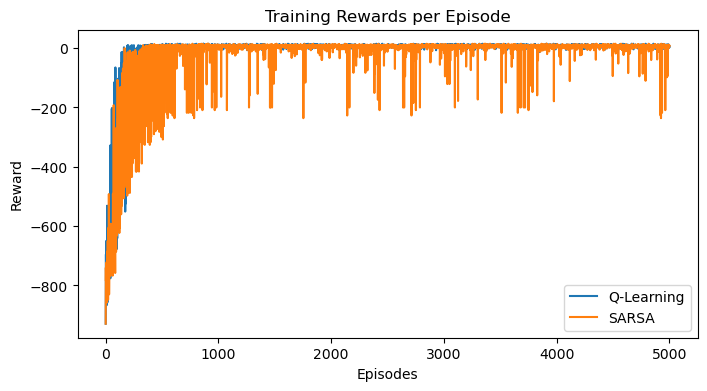

In [24]:
plt.figure(figsize=(8,4))
plt.plot(rewards_q, label="Q-Learning")
plt.plot(rewards_sarsa, label="SARSA")
plt.title("Training Rewards per Episode")
plt.ylabel("Reward")
plt.xlabel("Episodes")
plt.legend()
plt.show()


## Plot Test Reward Bar Chart

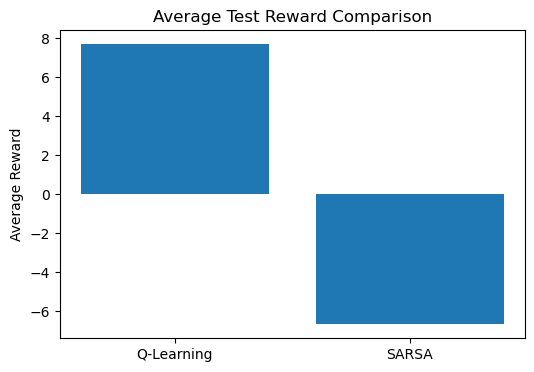

In [25]:
plt.figure(figsize=(6,4))
plt.bar(["Q-Learning","SARSA"],
        [sum(test_q)/len(test_q), sum(test_sarsa)/len(test_sarsa)])
plt.title("Average Test Reward Comparison")
plt.ylabel("Average Reward")
plt.show()


## Conclusion 

Why did SARSA perform worse here?

Reason	                                                            Explanation

SARSA learns from actions it's actually taking (on-policy)	 =           With high exploration early, it learns unsafe actions, leading to negative rewards


Q-learning assumes optimal future actions (off-policy)	     =            Learns faster initially in Taxi-v3

So with very small training:

    Q-learning > SARSA


But with more training (2000–5000 episodes):

     SARSA stabilizes and improves

## 🔥 Final Statement
Taxi-v3 for RL → Q-Learning is better than SARSA

because:
✔ Faster learning
✔ Higher average reward
✔ Consistent optimal path discovery